# Analyses from Pew Research COVID -19 Vaccine Study

The following are replications and additional analyses from a Pew Research Report and DataSet found here: 

https://www.pewresearch.org/science/2021/03/05/growing-share-of-americans-say-they-plan-to-get-a-covid-19-vaccine-or-already-have/

### Initial Install:

pyreadstat

numpy

Pandas

Matplotlib

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

In [4]:
#import data from Pew files

pewdata = pd.read_spss('ATP W83.sav')

In [71]:
#initial explore of the data

#pewdata.head()

In [93]:
#view all columns in the data set

#for col in pewdata.columns:
    #print (col)

## View of Economic Impact if Majority of Americans Vaccinated Against COVID-19  

In the Pew report, the following question was asked: 

If a large majority of Americans get a vaccine for COVID-19, what do you think the impact would be on the U.S. economy? Do you think it would...

1 Help the economy a lot

2 Help the economy a little

3 Not make much of a difference

This is denoted by the variable VACCECON in the codebook, and VACCECON_W83 in the pewdata dataset

In [13]:
#view of impact on the economy if majority americans vaccinated: VACCECON_W83

econimpact = pewdata.VACCECON_W83.value_counts()
econimpact

Help the economy a lot           6058
Help the economy a little        2304
Not make much of a difference    1620
Refused                           139
Name: VACCECON_W83, dtype: int64

In [15]:
#normalizing and rounding these numbers 
econimpact = pewdata.VACCECON_W83.value_counts(normalize = True).round(2)
econimpact

Help the economy a lot           0.60
Help the economy a little        0.23
Not make much of a difference    0.16
Refused                          0.01
Name: VACCECON_W83, dtype: float64

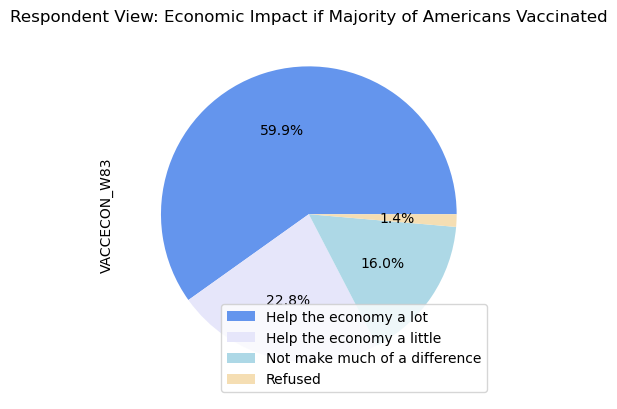

In [79]:
# pie chart using pandas series plot()

pewdata.VACCECON_W83.value_counts().plot(kind='pie', title = 'Respondent View: Economic Impact if Majority of Americans Vaccinated',colors = ["cornflowerblue", "lavender", "lightblue", "wheat"], autopct = '%1.1f%%' , labeldistance=None).legend(loc = 'lower right')




In [84]:
pewdata.SC1_W83.value_counts(normalize = True).round(2)

Mostly positive                        0.74
Equal positive and negative effects    0.21
Mostly negative                        0.04
Refused                                0.01
Name: SC1_W83, dtype: float64

## Relationship Between View of COVID-19 Vaccine Impact on Economy and Effect of Science on Society

In the same pew report as above, the following question was asked: 
Overall, would you say science has had a mostly positive effect on our society or a mostly negative effect on our society?

1 Mostly positive

2 Mostly negative

3 Equal positive and negative effects

This is denoted by the variable SC1 in the codebook, SC1_W83 in the pewdata dataset

In [86]:
#rearrange the axes from science positive to science negative, help economy a lot to not make a difference

In [92]:
pd.crosstab(pewdata.SC1_W83, pewdata.VACCECON_W83, normalize = 'index').round(2).reindex(['Mostly positive', 'Equal positive and negative effects','Mostly negative', 'Refused'])[['Help the economy a lot', 'Help the economy a little', 'Not make much of a difference', 'Refused']]


VACCECON_W83,Help the economy a lot,Help the economy a little,Not make much of a difference,Refused
SC1_W83,,,,
Mostly positive,0.69,0.21,0.09,0.01
Equal positive and negative effects,0.34,0.29,0.35,0.02
Mostly negative,0.23,0.26,0.49,0.02
Refused,0.45,0.25,0.24,0.06
